## Subjects as 3D vectors
Intra-state differences.

In [1]:
import numpy as np
from pathlib import Path
import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
from hyppo.independence import Dcorr
from scipy.stats import multiscale_graphcorr
from hyppo.ksample._utils import k_sample_transform
from graspy.plot import heatmap, pairplot

import sys
from collections import defaultdict

sys.path.append("../")
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2
%load_ext nb_black

/home/rflperry/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [2]:
## Define paths, get raw
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
# base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/")
groups, labels, subjs = get_latents(base_dir, flag="_gcca", ids=True)

<IPython.core.display.Javascript object>

In [3]:
labels

[['e', 'restingstate'],
 ['e', 'openmonitoring'],
 ['e', 'compassion'],
 ['n', 'restingstate'],
 ['n', 'openmonitoring'],
 ['n', 'compassion']]

<IPython.core.display.Javascript object>

In [4]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
label_transform = {
    "e": "Expert",
    "n": "Novice",
    "compassion": "Compasson",
    "restingstate": "Resting",
    "openmonitoring": "Open",
}
y_labels = [[a, b] for a, b in y]
state_labels = [b for _, b in y]
trait_labels = [a for a, _ in y]

<IPython.core.display.Javascript object>

In [5]:
subj_scans = defaultdict(lambda: defaultdict(dict))
for state, trait, subj, grads in zip(
    state_labels, trait_labels, np.concatenate(subjs), np.concatenate(groups)
):
    subj_scans[subj][state] = grads[:, 2]
    subj_scans[subj]["trait"] = trait

<IPython.core.display.Javascript object>

In [6]:
subj_diffs = []
subj_traits = []
for key, d in subj_scans.items():
    subj_diffs.append(
        [
            np.linalg.norm(d["compassion"] - d["restingstate"]),
            np.linalg.norm(d["openmonitoring"] - d["restingstate"]),
            np.linalg.norm(d["compassion"] - d["openmonitoring"]),
        ]
    )
    subj_traits.append(d["trait"])
subj_diffs = np.asarray(subj_diffs)

<IPython.core.display.Javascript object>

In [7]:
# %matplotlib inline
# import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

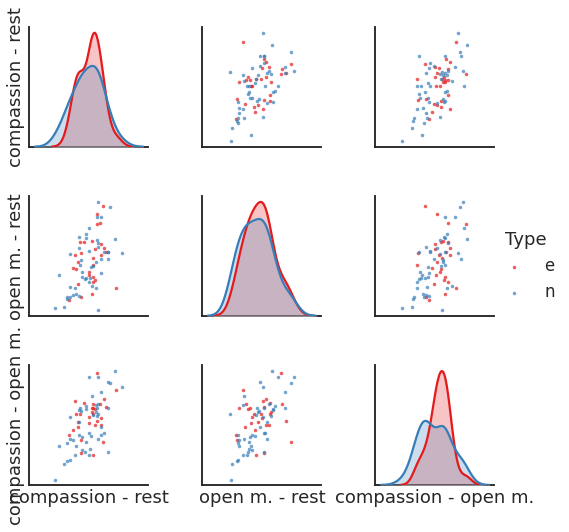

<IPython.core.display.Javascript object>

In [8]:
pairplot(
    np.asarray(subj_diffs),
    subj_traits,
    col_names=["compassion - rest", "open m. - rest", "compassion - open m."],
)

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


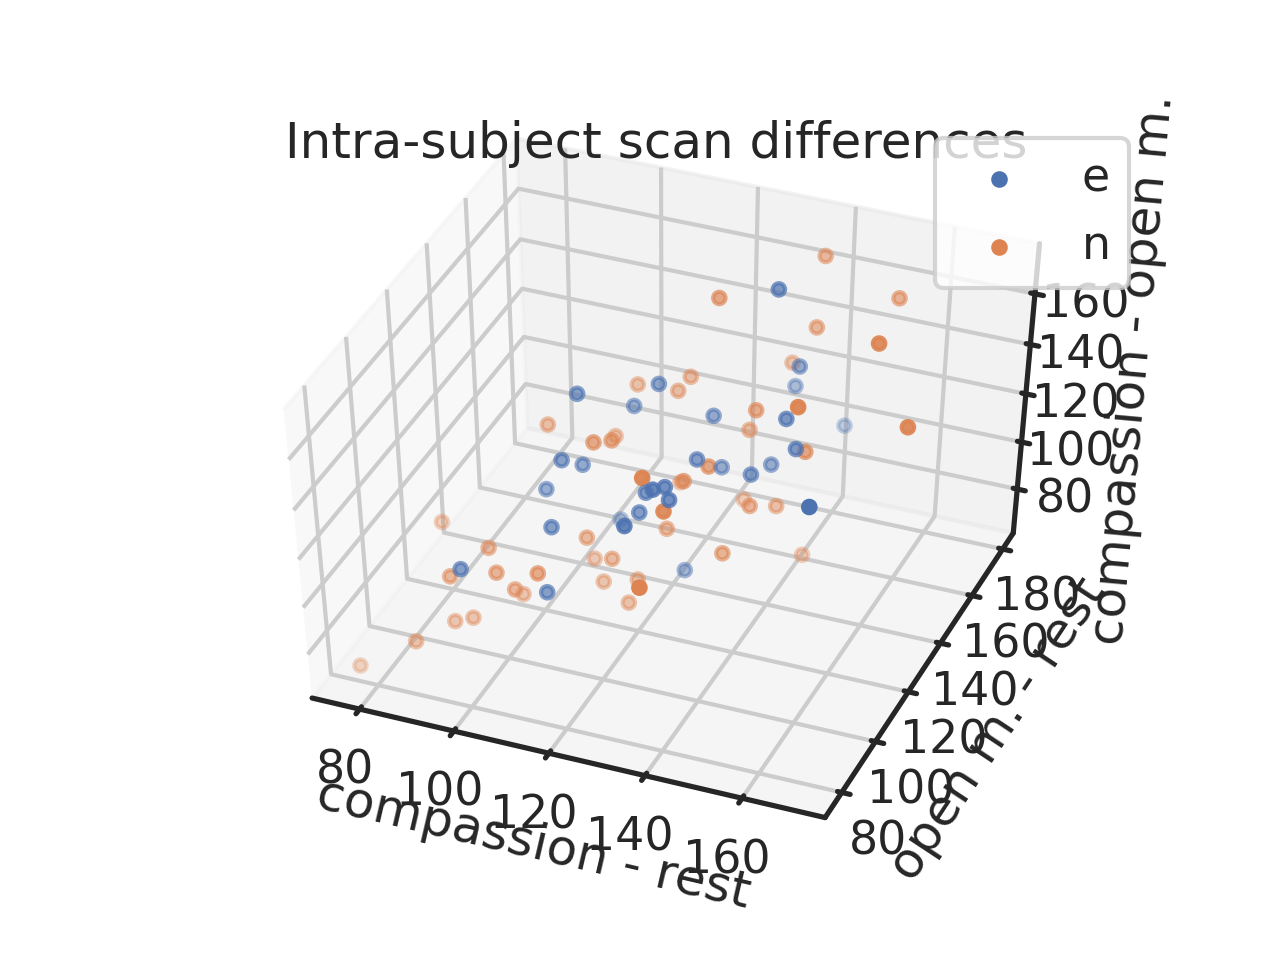

<IPython.core.display.Javascript object>

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for l in np.unique(subj_traits):
    idx = np.where(np.array(subj_traits) == l)[0]
    ax.scatter(
        subj_diffs[idx, 0],
        subj_diffs[idx, 1],
        subj_diffs[idx, 2],
        # c=[int(i == "e") for i in subj_traits],
        cmap="Set1",
        marker="o",
        label=l,
    )

ax.set_xlabel("compassion - rest")
ax.set_ylabel("open m. - rest")
ax.set_zlabel("compassion - open m.")
plt.legend()
plt.title("Intra-subject scan differences")
plt.show()

In [11]:
subj_scans = defaultdict(lambda: defaultdict(dict))
for state, trait, subj, grads in zip(
    state_labels, trait_labels, np.concatenate(subjs), np.concatenate(groups)
):
    subj_scans[subj][state] = grads[:, 2]
    subj_scans[subj]["trait"] = trait

subj_vars = []
subj_traits = []
for key, d in subj_scans.items():
    subj_vars.append(
        [
            np.std(d["compassion"] - d["restingstate"]),
            np.std(d["openmonitoring"] - d["restingstate"]),
            np.std(d["compassion"] - d["openmonitoring"]),
        ]
    )
    subj_traits.append(d["trait"])
subj_vars = np.asarray(subj_vars)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


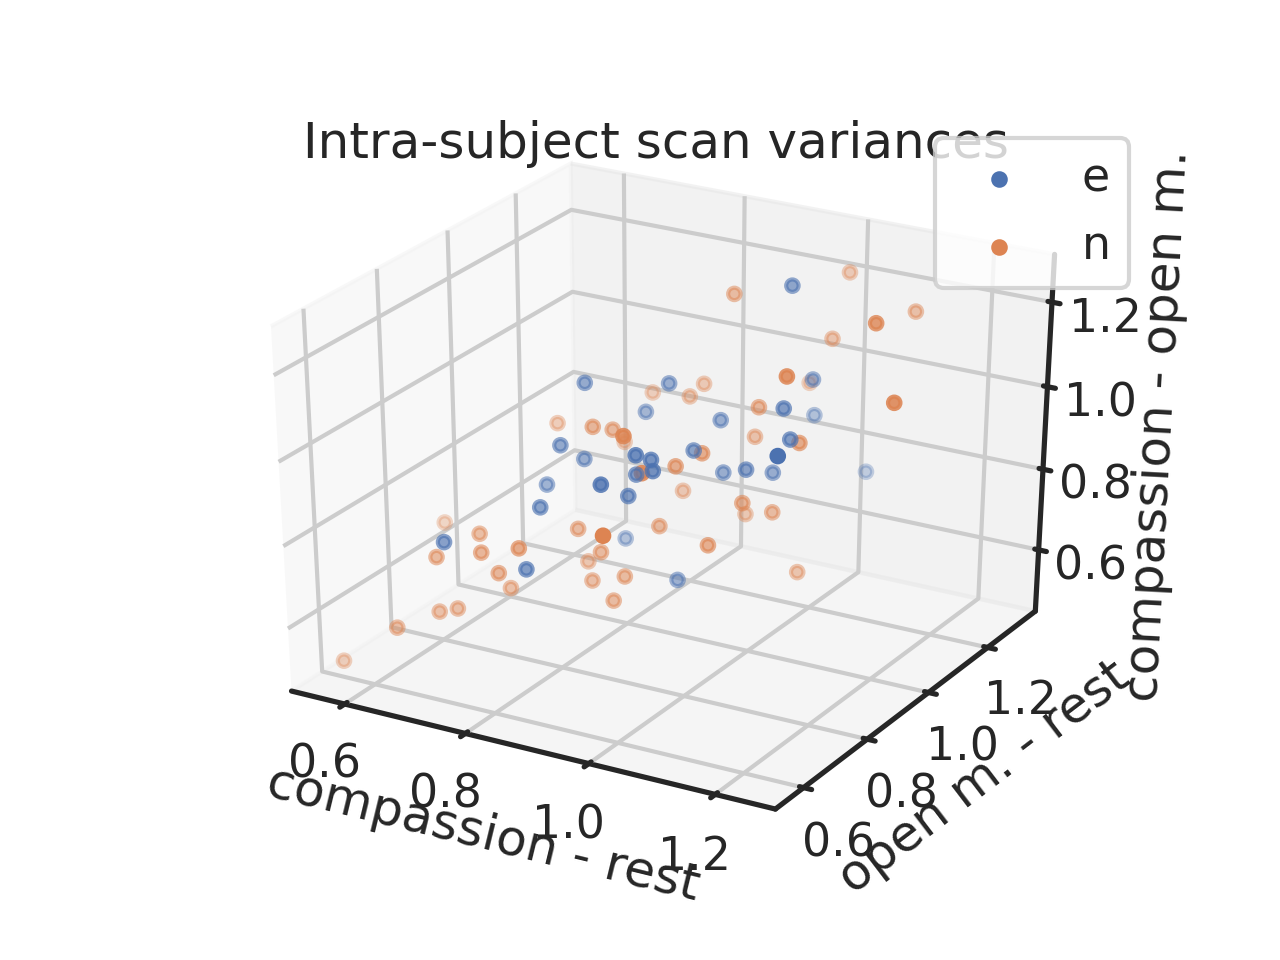

<IPython.core.display.Javascript object>

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for l in np.unique(subj_traits):
    idx = np.where(np.array(subj_traits) == l)[0]
    ax.scatter(
        subj_vars[idx, 0],
        subj_vars[idx, 1],
        subj_vars[idx, 2],
        # c=[int(i == "e") for i in subj_traits],
        cmap="Set1",
        marker="o",
        label=l,
    )

ax.set_xlabel("compassion - rest")
ax.set_ylabel("open m. - rest")
ax.set_zlabel("compassion - open m.")
plt.legend()
plt.title("Intra-subject scan variances")
plt.show()

In [13]:
subj_scans = defaultdict(lambda: defaultdict(dict))
for state, trait, subj, grads in zip(
    state_labels, trait_labels, np.concatenate(subjs), np.concatenate(groups)
):
    subj_scans[subj][state] = grads[:, 2]
    subj_scans[subj]["trait"] = trait

subj_means = []
subj_traits = []
for key, d in subj_scans.items():
    subj_means.append(
        [
            np.mean(d["compassion"] - d["restingstate"]),
            np.mean(d["openmonitoring"] - d["restingstate"]),
            np.mean(d["compassion"] - d["openmonitoring"]),
        ]
    )
    subj_traits.append(d["trait"])
subj_means = np.asarray(subj_means)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


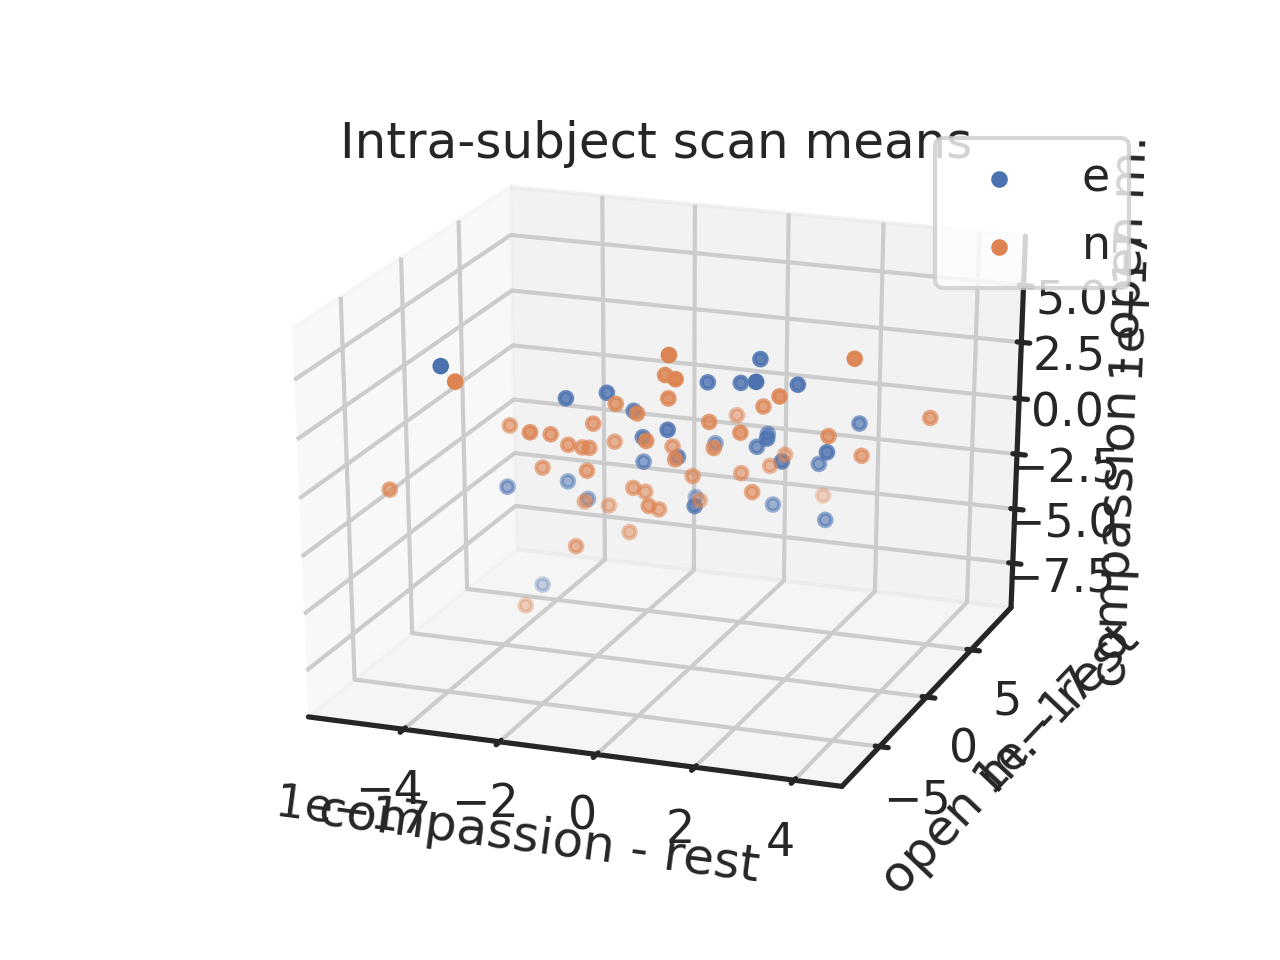

<IPython.core.display.Javascript object>

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for l in np.unique(subj_traits):
    idx = np.where(np.array(subj_traits) == l)[0]
    ax.scatter(
        subj_means[idx, 0],
        subj_means[idx, 1],
        subj_means[idx, 2],
        # c=[int(i == "e") for i in subj_traits],
        cmap="Set1",
        marker="o",
        label=l,
    )

ax.set_xlabel("compassion - rest")
ax.set_ylabel("open m. - rest")
ax.set_zlabel("compassion - open m.")
plt.legend()
plt.title("Intra-subject scan means")
plt.show()